<a href="https://colab.research.google.com/github/ngocthinh09/Self-taught-Machine-Learning/blob/main/Gi%E1%BB%9Bi%20thi%E1%BB%87u%20v%E1%BB%81%20Machine%20Learning/Linear_Regression/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo các thư viện matplotlib, numpy
import numpy
from numpy import array
import matplotlib
import matplotlib.pyplot as plt
#Đặt seed random
numpy.random.seed(5)

Nghiệm tối ưu khi giải bằng đạo hàm W = [[3.5367764  3.96712714]]


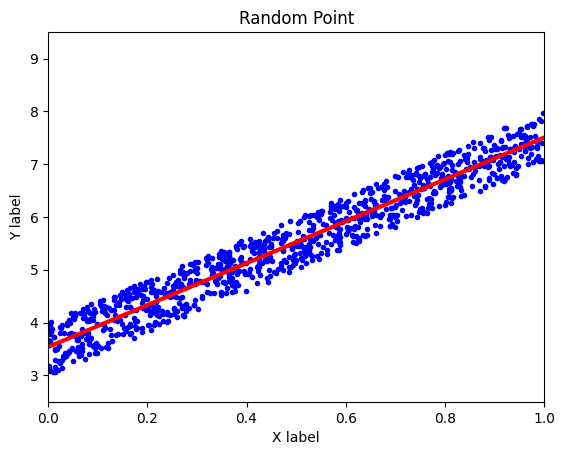

In [2]:
# Tạo các điểm lân cận so với đường thẳng y = 3 + 4*x
X = numpy.random.rand(1000,1)
Y = 3 + 4*X + numpy.random.rand(1000,1)

plt.title('Random Point')
plt.axis([0,1,2.5,9.5])
plt.xlabel('X label')
plt.ylabel('Y label')
plt.plot(X,Y,'b.')
# plt.show()


#Tìm nghiệm đạo hàm
one = numpy.ones((X.shape[0],1))
X_bar = numpy.concatenate((one,X),axis = 1)

A = (X_bar.T @ X_bar)
B = (X_bar.T @ Y)
w = (numpy.linalg.pinv(A) @ B)

print("Nghiệm tối ưu khi giải bằng đạo hàm W = {}".format(w.T))

w_0 = w[0][0]
w_1 = w[1][0]
x_p = numpy.linspace(0,1,2,endpoint=True)
y_p = w_0 + w_1*x_p

plt.plot(x_p, y_p, color = 'red', linewidth = 3)
plt.show()


###Gradient Descent cho hàm một biến

(np.float64(-1.1871514173694648), np.float64(-2.8922808452142688))


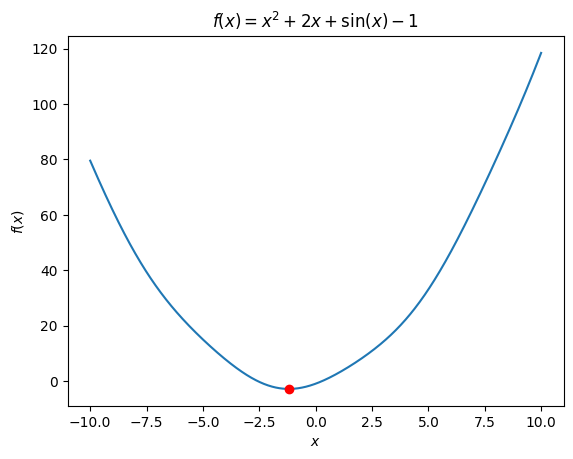

None


In [3]:
# Ví dụ sử dụng gradient descent tìm điểm cực tiểu cho hàm y = x^2 + 2x + sin(x) - 1
import math

def grad_value(x):
  return (2*x + 2 + numpy.cos(x))

def func_value(x):
  return (x**2 + 2*x + numpy.sin(x) - 1)

def find_minimum_point(learning_rate,x0):  # x0 là điểm khởi tạo ban đầu
  x = [x0]
  for it in range(100000000):
    x_new = x[-1] - learning_rate*grad_value(x[-1])
    if (abs(grad_value(x[-1])) < 1e-7):
      break
    else:
      x.append(x_new)
  return tuple([x[-1],func_value(x[-1])])

def plotting_function():
  x = numpy.linspace(-10,10,1000)
  y = func_value(x)

  plt.title(r'$f(x) = x^2 + 2x + \sin(x) - 1$')
  plt.plot(x, y)
  plt.xlabel(r'$x$')
  plt.ylabel(r'$f(x)$')

  minimum_point = find_minimum_point(0.2,5)

  plt.plot(minimum_point[0],minimum_point[1],'ro')
  print(minimum_point)
  plt.show()

print(plotting_function())

### Gradient Descent cho hàm nhiều biến

#### Tính đạo hàm của hàm nhiều biến bằng Numerical Gradient
-  So sánh cách tính đạo hàm bằng Numerical Gradient so với tính bằng công thức


In [4]:
class Loss_Function:
  def __init__(self,X_bar,Y):
    self.X_bar = X_bar
    self.Y = Y

  def grad(self,w): # Tính đạo hàm của hàm Loss tại w
    N = X_bar.shape[0]
    return (1/N)*(self.X_bar.T @ (self.X_bar @ w - self.Y))

  def loss_func(self,w): # Giá trị của hàm Loss tại w
    N = X_bar.shape[0]
    return (1/(2*N))*(numpy.linalg.norm(self.Y - (self.X_bar @ w),2)**2)

# Tính đạo hàm tại w bằng Numerical Gradient
def numerical_grad(w, cost):
  eps = 1e-6
  res = numpy.zeros_like(w)
  for i in range(len(w)): # Tính đạo hàm riêng theo w[i]
    w_plus = w.copy()
    w_minus = w.copy()
    w_plus[i] += eps    # Tiến về cả hai phía trái phải
    w_minus[i] -= eps
    res[i] = (cost(w_plus) - cost(w_minus))/(2*eps)
  return res

# So sánh chênh lệch về giá trị đạo hàm tại w giữa cách tính đạo hàm bằng công thức nghiệm và Numerical Gradient
def check_grad(w, cost, grad):
  grad_normal = grad(w)
  grad_numerical = numerical_grad(w,cost)
  print(grad_normal)
  print(grad_numerical)

  flag = (numpy.linalg.norm(grad_normal - grad_numerical) < 1e-6)
  return flag

ls = Loss_Function(X_bar,Y)
base = numpy.array([[2.0], [1.0]])
print('Checking gradient... {}'.format(check_grad(base,ls.loss_func,ls.grad)))


[[-3.00811418]
 [-1.73412708]]
[[-3.00811418]
 [-1.73412708]]
Checking gradient... True


- Tính đạo hàm tại một điểm $(x_0,y_0)$ của hàm $f(x,y) = (x^2 + y - 7)^2 + (x - y + 1)^2$
- Tìm Local Minimum của hàm

In [5]:
class Base_Function:
  def base_func(self,w):
    x = w[0][0]
    y = w[1][0]
    return (x**2 + y - 7)**2 + (x - y + 1)**2

  def numerical_grad(self,w):
    eps = 1e-9
    res = numpy.zeros_like(w)
    for i in range(len(w)):
      w_plus = w.copy()
      w_minus = w.copy()
      w_plus[i] += eps
      w_minus[i] -= eps
      res[i] = (self.base_func(w_plus) - self.base_func(w_minus))/(2*eps)
    return res

  def gradient_descent(self,learning_rate,init_point):
    xy = init_point
    for i in range(1000):
      xy_new = xy - learning_rate*self.numerical_grad(xy)
      if (numpy.linalg.norm(self.numerical_grad(xy_new)) < 1e-4):
        break
      xy = xy_new
    return xy


fxy = Base_Function()
x0_y0 = numpy.array([[-4.0], [-5.0]])
# print(fxy.numerical_grad(x0_y0))
local = fxy.gradient_descent(0.01,x0_y0)
print(local.T)


[[-3.00001455 -2.00007553]]
